## Explain Any Models with the SHAP Values

Ноутбук взят отсюда: https://github.com/dataman-git/codes_for_articles/blob/master/Explain%20any%20models%20with%20the%20SHAP%20values%20-%20the%20KernelExplainer%20for%20article.ipynb

* Install SHAP from here: https://github.com/slundberg/shap

* Please read [Explain Any Models with the SHAP Values](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

In [1]:
import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

In [9]:
df.columns
df['quality'] = df['quality'].astype(int)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


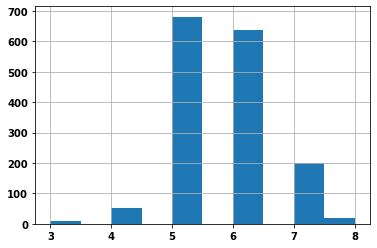

In [11]:
df['quality'].hist()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [14]:
X_test.shape

(160, 11)

In [15]:
X_test.mean()

fixed acidity            8.239375
volatile acidity         0.513281
citric acid              0.269813
residual sugar           2.557500
chlorides                0.086425
free sulfur dioxide     14.981250
total sulfur dioxide    42.506250
density                  0.996653
pH                       3.318500
sulphates                0.652062
alcohol                 10.481250
dtype: float64

In [16]:
X_test.iloc[10,:]

fixed acidity            8.60000
volatile acidity         0.52000
citric acid              0.38000
residual sugar           1.50000
chlorides                0.09600
free sulfur dioxide      5.00000
total sulfur dioxide    18.00000
density                  0.99666
pH                       3.20000
sulphates                0.52000
alcohol                  9.40000
Name: 1099, dtype: float64

### Random Forest

[0.03279718 0.16212684 0.01720764 0.03965912 0.03606932 0.01562006
 0.07127238 0.03328242 0.03568697 0.16817872 0.38809936]


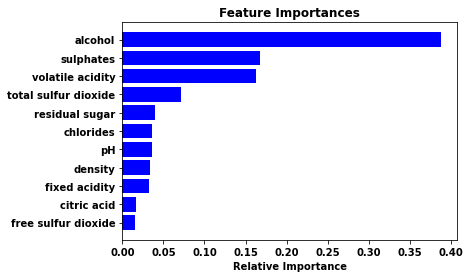

In [17]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [2]:
X_test[0:1]

NameError: name 'X_test' is not defined

In [19]:
import shap
shap.initjs()
rf_explainer = shap.KernelExplainer(rf.predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [20]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
31,6.9,0.685,0.00,2.50,0.105,22.0,37.0,0.99660,3.46,0.57,10.6
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
223,8.6,0.645,0.25,2.00,0.083,8.0,28.0,0.99815,3.28,0.60,10.0
1121,6.6,0.500,0.00,1.80,0.062,21.0,28.0,0.99352,3.44,0.55,12.3


In [25]:
rf_explainer.expected_value

5.634390395656761

In [26]:
# plot the SHAP values for the 10th observation 
shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [27]:
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)

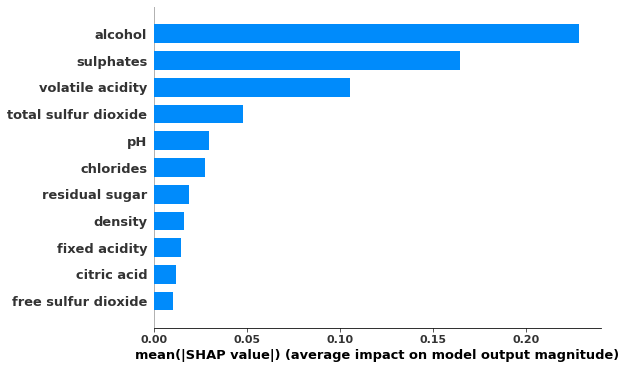

In [28]:
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

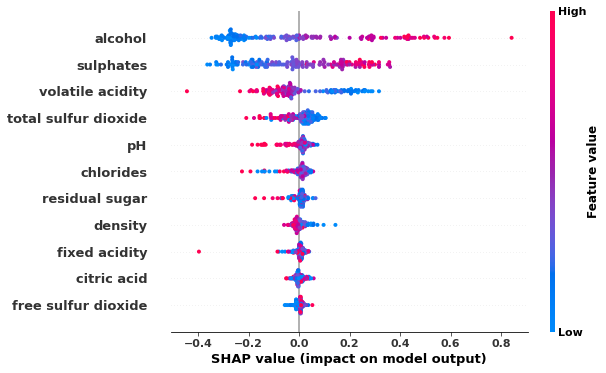

In [29]:
shap.summary_plot(rf_shap_values, X_test)

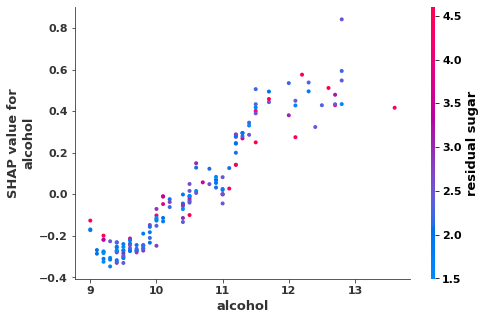

In [30]:
shap.dependence_plot("alcohol", rf_shap_values, X_test)

### GBM

In [32]:
from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=500, random_state=0)

In [33]:
gbm_explainer = shap.KernelExplainer(gbm.predict, X_test)
gbm_shap_values = gbm_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


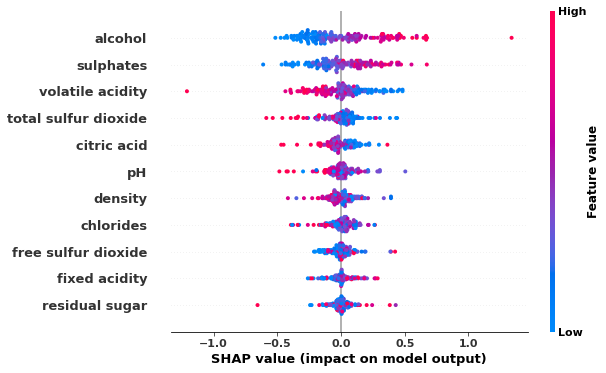

In [34]:
shap.summary_plot(gbm_shap_values, X_test)

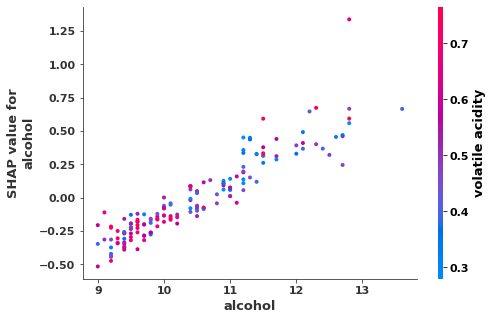

In [35]:
shap.dependence_plot("alcohol", gbm_shap_values, X_test)

In [36]:
# plot the SHAP values for the 10th observation 
shap.force_plot(gbm_explainer.expected_value,gbm_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [37]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

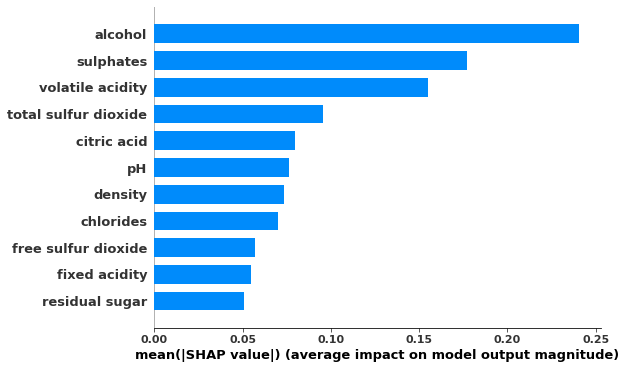

In [40]:
shap.summary_plot(gbm_shap_values, X_test, plot_type="bar")

### XGB

In [44]:
from xgboost import XGBClassifier
n_estimators = 500
xgb = XGBClassifier(
            n_estimators=n_estimators,
            random_state=0)
xgb.fit(X_train, Y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
xgb_explainer = shap.KernelExplainer(xgb.predict, X_test)
xgb_shap_values = xgb_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap.dependence_plot("alcohol", xgb_shap_values, X_test)

In [ ]:
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values, X_test)

### KNN

In [16]:
from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [18]:
knn_explainer = shap.KernelExplainer(knn.predict, X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the n

/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


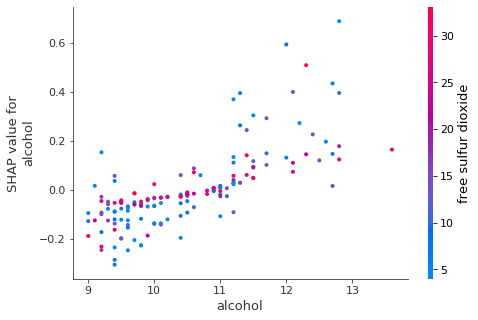

In [19]:
shap.dependence_plot("alcohol", knn_shap_values, X_test)

In [43]:
# plot the SHAP values for the 10th observation 
shap.force_plot(knn_explainer.expected_value,knn_shap_values[10,:], X_test.iloc[10,:]) 

In [20]:
shap.force_plot(knn_explainer.expected_value, knn_shap_values, X_test)

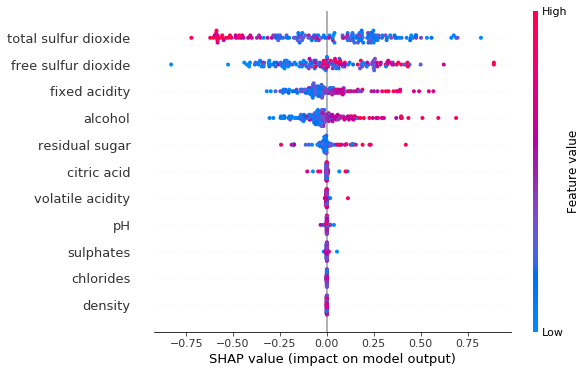

In [21]:
shap.summary_plot(knn_shap_values, X_test)

### SVM

In [11]:
from sklearn import svm
svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm.fit(X_train, Y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

Using 160 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the n

/Users/chriskuo/anaconda3/envs/AD/lib/python3.7/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


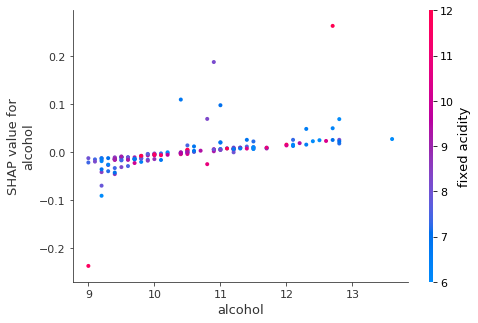

In [13]:
shap.dependence_plot("alcohol", svm_shap_values, X_test)

In [44]:
# plot the SHAP values for the 10th observation 
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 

In [14]:
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

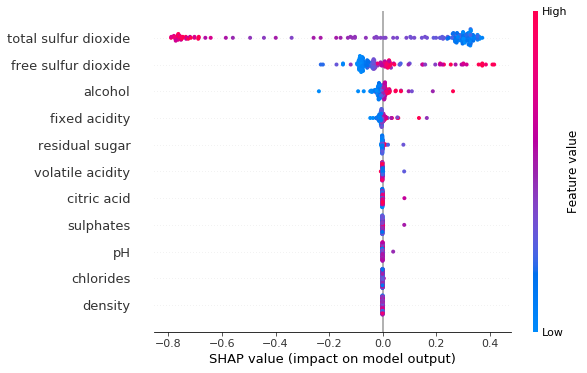

In [15]:
shap.summary_plot(svm_shap_values, X_test)